In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

INSURANCE_CARS = 'carInsurance.csv'

tb = pd.read_csv(INSURANCE_CARS)

print(tb.head)


<bound method NDFrame.head of         SEX INSR_BEGIN   INSR_END EFFECTIVE_YR  INSR_TYPE  INSURED_VALUE  \
0         0  08-AUG-13  07-AUG-14           08       1202      519755.22   
1         0  08-AUG-12  07-AUG-13           08       1202      519755.22   
2         0  08-AUG-11  07-AUG-12           08       1202      519755.22   
3         0  08-JUL-11  07-AUG-11           08       1202      519755.22   
4         0  08-AUG-13  07-AUG-14           08       1202      285451.24   
...     ...        ...        ...          ...        ...            ...   
293532    2  11-AUG-12  10-AUG-13           88       1201           0.00   
293533    2  11-AUG-11  10-AUG-12           88       1201           0.00   
293534    2  01-JUN-13  31-MAY-14           13       1201      250000.00   
293535    0  08-JUL-12  07-JUL-13           85       1202           0.00   
293536    0  08-JUL-11  07-JUL-12           85       1202           0.00   

         PREMIUM   OBJECT_ID  PROD_YEAR  SEATS_NUM  CARRY

In [58]:
#exploracion inicial
print("exploracion inicial ")
print(tb.info())

print(tb.describe())

exploracion inicial 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293537 entries, 0 to 293536
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                293537 non-null  int64  
 1   INSR_BEGIN         293537 non-null  object 
 2   INSR_END           293537 non-null  object 
 3   EFFECTIVE_YR       293536 non-null  object 
 4   INSR_TYPE          293537 non-null  int64  
 5   INSURED_VALUE      293537 non-null  float64
 6   PREMIUM            293529 non-null  float64
 7   OBJECT_ID          293537 non-null  int64  
 8   PROD_YEAR          293431 non-null  float64
 9   SEATS_NUM          293397 non-null  float64
 10  CARRYING_CAPACITY  212172 non-null  float64
 11  TYPE_VEHICLE       293537 non-null  object 
 12  CCM_TON            293535 non-null  float64
 13  MAKE               293537 non-null  object 
 14  USAGE              293537 non-null  object 
 15  CLAIM_PAID         22373 non-n

0         NaN
1         NaN
2         NaN
3         NaN
4    19894.43
Name: CLAIM_PAID, dtype: float64


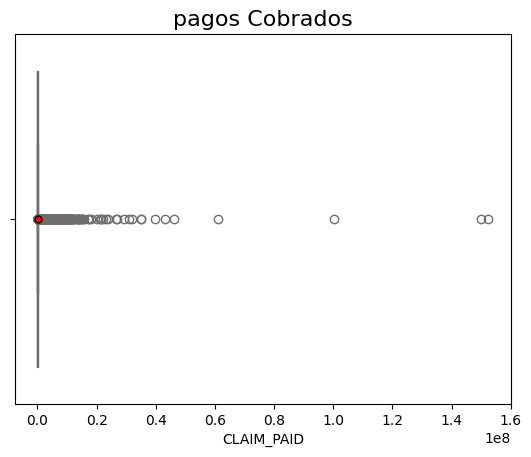

<bound method Series.median of 0              NaN
1              NaN
2              NaN
3              NaN
4         19894.43
            ...   
293532         NaN
293533         NaN
293534         NaN
293535         NaN
293536         NaN
Name: CLAIM_PAID, Length: 293537, dtype: float64>


In [59]:
#Buscando outliner para evaluar si claim_Paid lo vuelvo 0 o le aplico la media
#Detecion de outliners
box = sns.boxplot(
    x=tb["CLAIM_PAID"], 
    color="skyblue", 
    width=0.8, 
    showmeans=True,  
    meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"5"} 
)
plt.yticks(fontsize=10)
plt.title("pagos Cobrados", fontsize=16)
print(tb["CLAIM_PAID"].head())
plt.show()
print(tb["CLAIM_PAID"].median)

In [60]:
#optamos por la mediana ya que tenemos outliners, la mediana seria la opcion mas optima
tb['CLAIM_PAID'].fillna(tb['CLAIM_PAID'].median(), inplace=True)  

C:\Users\alexa\AppData\Local\Temp\ipykernel_4136\144012063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tb['CLAIM_PAID'].fillna(tb['CLAIM_PAID'].median(), inplace=True)


In [44]:
#Seleccionamos los datos mas relevantes
df_selected = tb[['SEX', 'INSURED_VALUE','PROD_YEAR','SEATS_NUM','TYPE_VEHICLE','CCM_TON','MAKE','USAGE','CLAIM_PAID']]

print(df_selected.head())

   SEX  INSURED_VALUE  PROD_YEAR  SEATS_NUM TYPE_VEHICLE  CCM_TON    MAKE  \
0    0      519755.22     2007.0        4.0      Pick-up   3153.0  NISSAN   
1    0      519755.22     2007.0        4.0      Pick-up   3153.0  NISSAN   
2    0      519755.22     2007.0        4.0      Pick-up   3153.0  NISSAN   
3    0      519755.22     2007.0        4.0      Pick-up   3153.0  NISSAN   
4    0      285451.24     2010.0        4.0      Pick-up   2494.0  TOYOTA   

       USAGE  CLAIM_PAID  
0  Own Goods    31079.54  
1  Own Goods    31079.54  
2  Own Goods    31079.54  
3  Own Goods    31079.54  
4  Own Goods    19894.43  


In [45]:
stats = tb.describe()

mediana_claim_paid = tb['CLAIM_PAID'].median()
moda_claim_paid = tb['CLAIM_PAID'].mode()[0] 

print(stats)
print(f"--------------------------------------------")
print(f"Mediana de CLAIM_PAID: {mediana_claim_paid}")
print(f"Moda de CLAIM_PAID: {moda_claim_paid}")
print(f"--------------------------------------------")
print(f"------------Tabla de Frecuencia-------------")

frecuencia_tipo_vehiculo = tb['TYPE_VEHICLE'].value_counts()
print(frecuencia_tipo_vehiculo)

                 SEX      INSR_TYPE  INSURED_VALUE        PREMIUM  \
count  293537.000000  293537.000000   2.935370e+05  293529.000000   
mean        0.510154    1201.714268   4.146088e+05    6476.056811   
std         0.645379       0.455481   8.353941e+05    9039.792585   
min         0.000000    1201.000000   0.000000e+00       0.000000   
25%         0.000000    1201.000000   0.000000e+00     804.850000   
50%         0.000000    1202.000000   2.000000e+05    3154.017000   
75%         1.000000    1202.000000   5.854500e+05    8293.213000   
max         2.000000    1204.000000   2.500000e+08  227278.880000   

          OBJECT_ID      PROD_YEAR      SEATS_NUM  CARRYING_CAPACITY  \
count  2.935370e+05  293431.000000  293397.000000      212172.000000   
mean   5.000237e+09    2001.394900       6.182504         648.037967   
std    1.683947e+05      10.305091      13.045420        4838.746032   
min    5.000018e+09    1950.000000       0.000000           0.000000   
25%    5.000097e+0

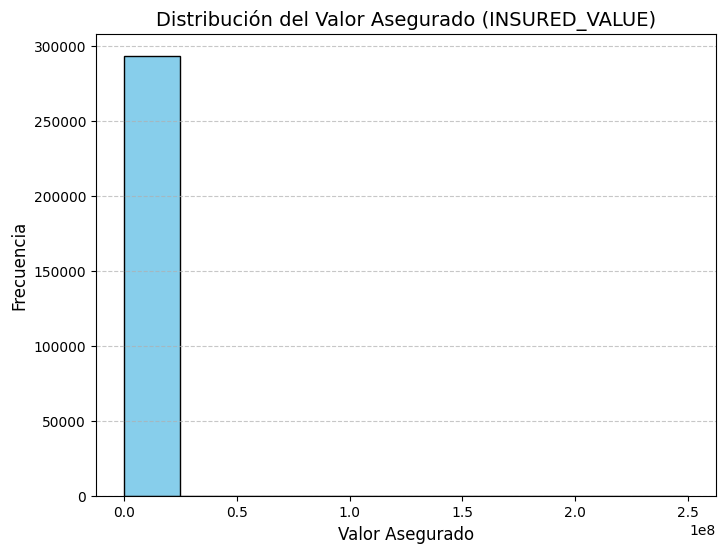

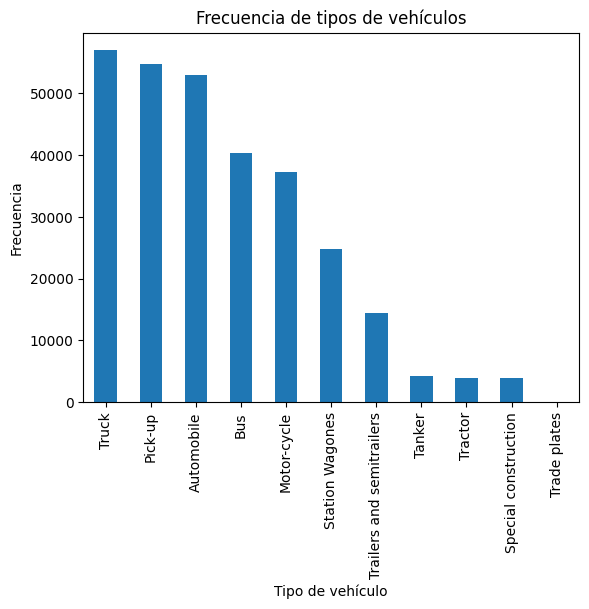

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(tb['INSURED_VALUE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución del Valor Asegurado (INSURED_VALUE)', fontsize=14)
plt.xlabel('Valor Asegurado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

tb['TYPE_VEHICLE'].value_counts().plot(kind='bar', title='Frecuencia de tipos de vehículos')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Frecuencia')
plt.show()


Correlación entre INSURED_VALUE y CLAIM_PAID:
               INSURED_VALUE  CLAIM_PAID
INSURED_VALUE       1.000000    0.031867
CLAIM_PAID          0.031867    1.000000


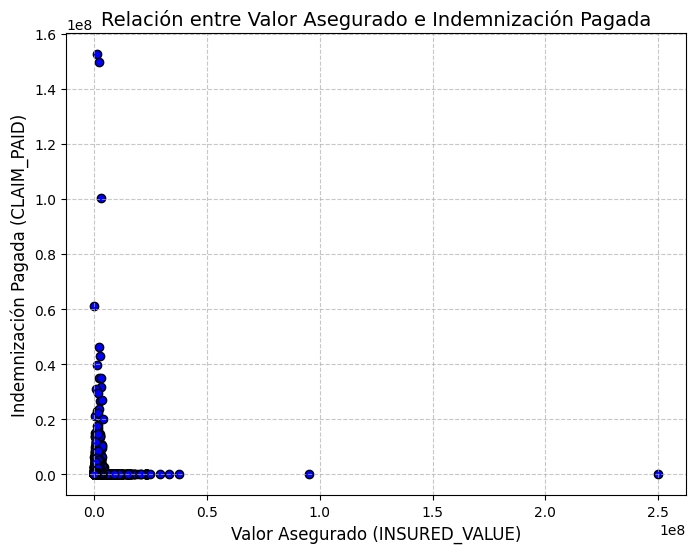

In [47]:
correlacion = tb[['INSURED_VALUE', 'CLAIM_PAID']].corr()

print(f"Correlación entre INSURED_VALUE y CLAIM_PAID:\n{correlacion}")

plt.figure(figsize=(8, 6))
plt.scatter(tb['INSURED_VALUE'], tb['CLAIM_PAID'], color='blue', edgecolor='black')
plt.title('Relación entre Valor Asegurado e Indemnización Pagada', fontsize=14)
plt.xlabel('Valor Asegurado (INSURED_VALUE)', fontsize=12)
plt.ylabel('Indemnización Pagada (CLAIM_PAID)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

SEATS_NUM                  0.0    1.0    2.0    3.0    4.0    5.0    6.0    \
TYPE_VEHICLE                                                                 
Automobile                   658     85     73    342  45785   2111    921   
Bus                          229    150    185    233    341    317    263   
Motor-cycle                 1419  15074    723  16926   2666    385      3   
Pick-up                      976   6686   6294    148  38411   1937     93   
Special construction        1511    968    309    125    122    141    255   
Station Wagones              557     72    147    123   4103   1070   2338   
Tanker                       254   2616   1292      8     10      6      3   
Tractor                     2920    909     19      3      0      3      0   
Trade plates                   5      0      0      0      0      0      0   
Trailers and semitrailers  14138    195     38      0      8      1      1   
Truck                       3481  27735  25451    123     90    

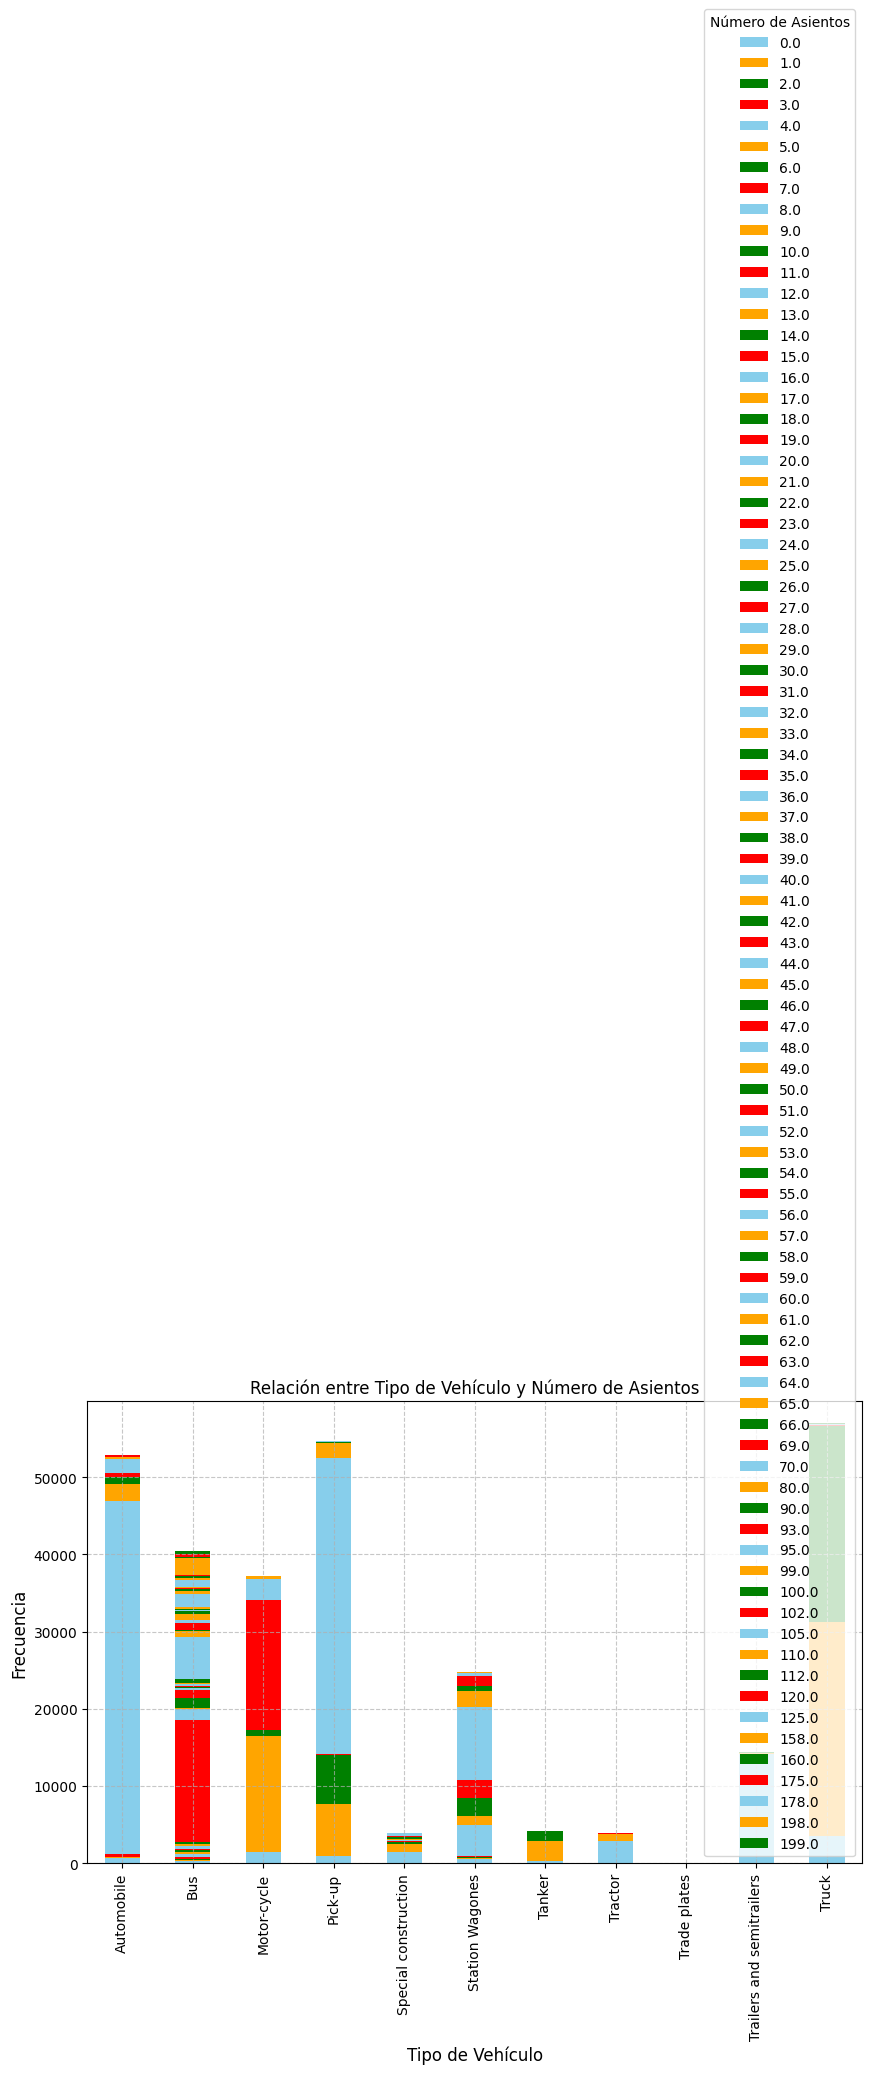

In [65]:
tabla_frecuencia = pd.crosstab(tb['TYPE_VEHICLE'], tb['SEATS_NUM'])

print(tabla_frecuencia)


# Gráfico de barras apilado para visualizar la distribución
tabla_frecuencia.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red'])
plt.title('Relación entre Tipo de Vehículo y Número de Asientos', fontsize=12)
plt.xlabel('Tipo de Vehículo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Número de Asientos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

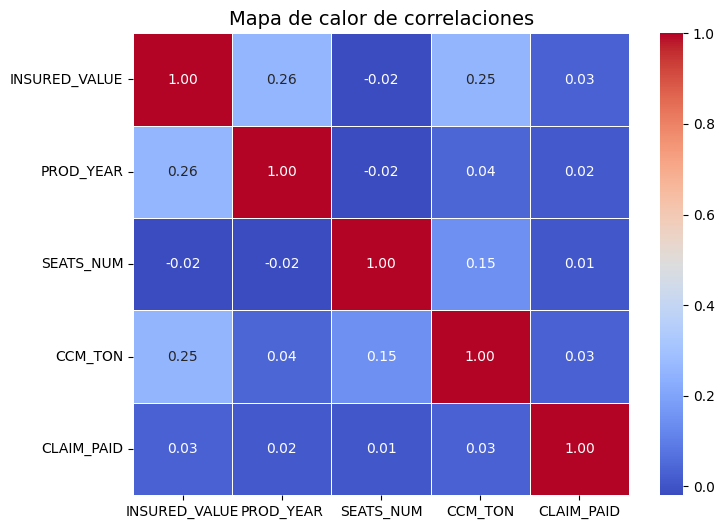

In [67]:
import numpy as np
correlacion = tb[['INSURED_VALUE', 'PROD_YEAR', 'SEATS_NUM', 'CCM_TON', 'CLAIM_PAID']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Mapa de calor de correlaciones', fontsize=14)
plt.show()

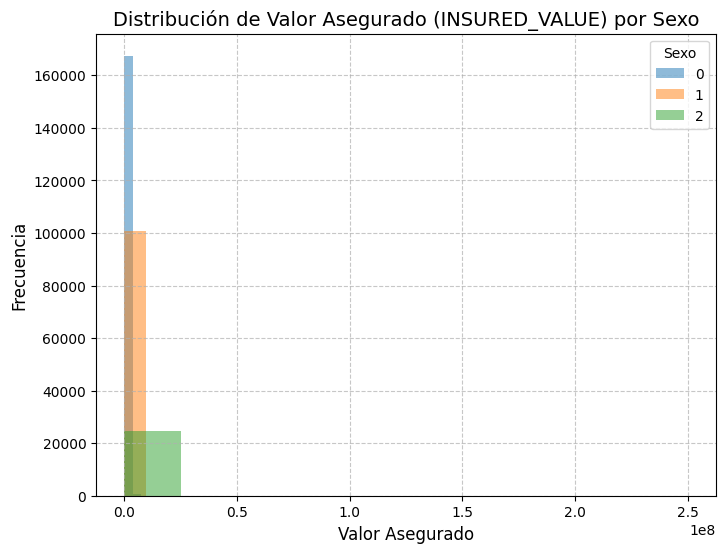

In [68]:
plt.figure(figsize=(8, 6))
tb.groupby('SEX')['INSURED_VALUE'].plot(kind='hist', bins=10, alpha=0.5, stacked=True, legend=True)
plt.title('Distribución de Valor Asegurado (INSURED_VALUE) por Sexo', fontsize=14)
plt.xlabel('Valor Asegurado', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sexo')
plt.show()

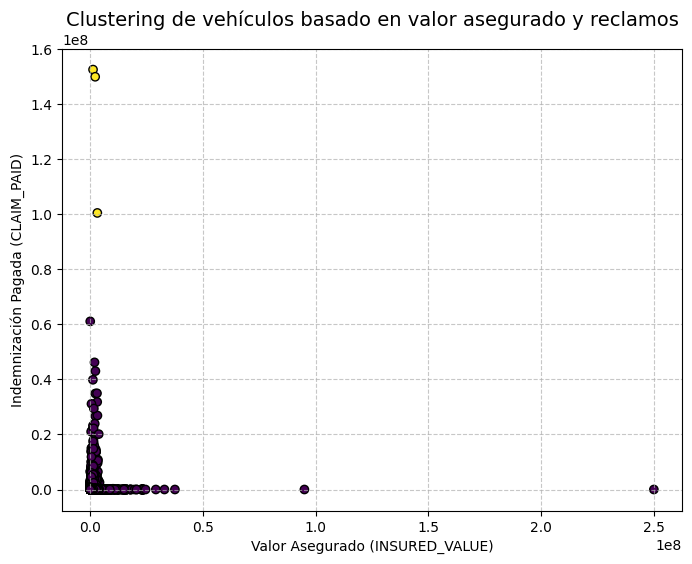

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = tb[['INSURED_VALUE', 'PROD_YEAR', 'SEATS_NUM', 'CLAIM_PAID']].fillna(0) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
tb['Cluster'] = kmeans.fit_predict(X_scaled)

grouped = tb.groupby('Cluster').mean(numeric_only=True) 

plt.figure(figsize=(8, 6))
plt.scatter(tb['INSURED_VALUE'], tb['CLAIM_PAID'], c=tb['Cluster'], cmap='viridis', edgecolor='k')
plt.title('Clustering de vehículos basado en valor asegurado y reclamos', fontsize=14)
plt.xlabel('Valor Asegurado (INSURED_VALUE)')
plt.ylabel('Indemnización Pagada (CLAIM_PAID)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Anomalías detectadas:
        SEX INSR_BEGIN   INSR_END EFFECTIVE_YR  INSR_TYPE  INSURED_VALUE  \
11        1  24-NOV-13  23-NOV-14           12       1202     3400000.00   
13        1  24-NOV-12  23-NOV-13           12       1202     3200000.00   
26        1  19-NOV-11  18-NOV-12           11       1202     2363510.00   
34        1  13-JUL-12  12-JUL-13           10       1202     2592457.65   
35        1  13-JUL-11  12-JUL-12           10       1202     2592457.65   
...     ...        ...        ...          ...        ...            ...   
293477    0  06-MAY-14  05-MAY-15           10       1202     3387234.89   
293484    0  21-MAY-14  20-MAY-15           14       1202     2607970.00   
293485    0  21-MAY-14  20-MAY-15           14       1202     2607970.00   
293492    0  21-MAY-14  20-MAY-15           14       1202     2607970.00   
293493    0  21-MAY-14  20-MAY-15           14       1202     2607970.00   

          PREMIUM   OBJECT_ID  PROD_YEAR  SEATS_NUM  CARRYING_CAP

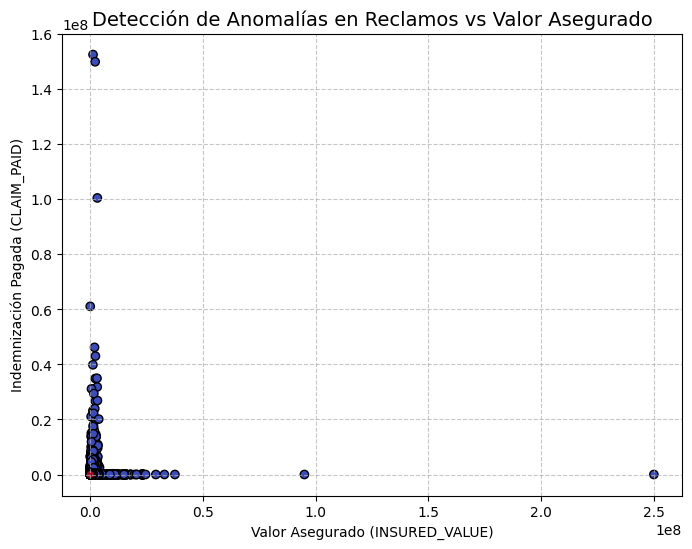

In [74]:
from sklearn.ensemble import IsolationForest

X_anomalies = tb[['INSURED_VALUE', 'CLAIM_PAID']].fillna(0) 

iso_forest = IsolationForest(contamination=0.05, random_state=42)  
tb['Anomalía'] = iso_forest.fit_predict(X_anomalies)

anomalies = tb[tb['Anomalía'] == -1]
print("Anomalías detectadas:")
print(anomalies)

plt.figure(figsize=(8, 6))
plt.scatter(tb['INSURED_VALUE'], tb['CLAIM_PAID'], c=tb['Anomalía'], cmap='coolwarm', edgecolor='k')
plt.title('Detección de Anomalías en Reclamos vs Valor Asegurado', fontsize=14)
plt.xlabel('Valor Asegurado (INSURED_VALUE)')
plt.ylabel('Indemnización Pagada (CLAIM_PAID)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()